## Step 8.5
Creating a histogram. 

I need to fundamentally change how they are being split into bins if I do the histogram the old fashioned way. 

Options:
 - Make a fake histogram with the KS stat along the bottom and the porportions being the bars.
 - make a fake histogram with the KS fractions along the bottom (10%,20%,30%,40%,50%,60%,etc) and then divide the two histograms by each other

Ethan will probably want to see all options. 

Note: My determine enrichment function is currently unable to handle division by zero which would be an unavoidable problem in the case of selenocysteine. Also, real histograms will only make this ore difficult for me, fake histograms for the win.

# Histogram with fraction bins

In [73]:
def split_sections(combo_df, N_secs): 
    '''
    A function that determine the proportion of target genes from target that are found in
    all_g ks for a specified number of KS fractions. 
    '''
    ratios = []
    sections = np.array_split(combo_df,N_secs)
    for i in sections:
        N_t = 0
        for j in i["Gene"].notnull():
            if j == True:
                N_t = N_t+1
        ratios.append(N_t/len(i))
    return ratios


In [74]:
ratios = split_sections(combo_df, 20)

In [75]:
len(ratios)

20

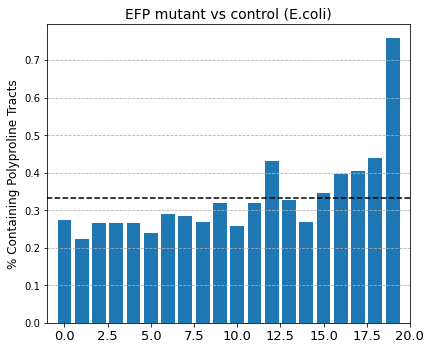

In [80]:
###!!! I need to figure out how to change the labels so that it is clear thateach bar is between say 0 and 10 or is the top 10%. 
figure(figsize = (6.5,5.5))
plt.bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],ratios, width = 0.8)
plt.xticks(fontsize = 13)
plt.xlim(-1,20)
#plt.ylim(0, 1)
plt.ylabel("% Containing Polyproline Tracts", fontsize = 12)
plt.title("EFP mutant vs control (E.coli)", fontsize = 14)
axes = plt.gca()
axes.yaxis.grid(linestyle = "--")
#axes.set_yticklabels([0, 20, 40, 60, 80, 100])
#plt.text(3.45, expected*0.96, "All proteins", fontsize = 10)

# Create a line showing the expected proportion of targets. 
plt.plot([-350,3150],[expected,expected], color = "black", linestyle = "--")
#plt.savefig(save_path + 'ecoli_proportions.pdf', bbox_inches = "tight")

# Histogram with KS bins

In [81]:
# Calculate the upper KS value as the average of the 10% of transcripts with the highest KS stat. 
# The upper KS fraction will include all of the transcripts with a KS score above this value.
perc = int(len(df_ecol)*0.9)
upper_ks = sorted(df_ecol.ks_stat)[perc:-1]

# Calculate the proportion of genes which are Fmr1 targets in a high, medium, and low KS fraction
N_cats = 9
ratios_ecol, sections_ecol = kat.determine_enrichment(PPP_ks_table, df_ecol, upper_ks[0], N_cats)

<BarContainer object of 10 artists>

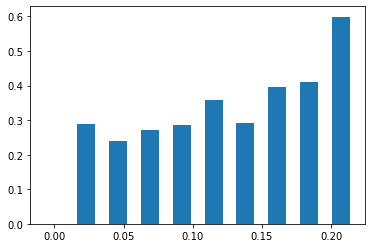

In [83]:
plt.bar(sections_ecol,ratios_ecol, width = 0.013)